### MIE 1517 - Intro to Deep Learning 
### Armando Ordorica
### 1005592164



# Part 1. Data Loading and Splitting [3pt EXPLORATORY]
**Download the anonymized data provided on Quercus. Split the data into training, validation, and test sets.**

**Note: Data splitting is not as trivial in this assignment. We want our test set to closely resemble the setting in which our model will be used. In particular, our test set should contain hands that are never seen in training!**


**Explain how you split the data, either by describing what you did, or by showing the code that you used. Justify your choice of splitting strategy.**


> The provided code organizes image files into training, validation, and test categories based on their naming format: index_letter_sequence.jpg. This categorization is derived from the prefix index of each filename, directing images to their designated folders (train, val, test) within a central directory. As an example, the '33' in '33_H_22.jpg' determines its classification.

> Grouping images by the same index ensures they're placed in a single subset—either training, validation, or test. This grouping is crucial because images with identical indices, albeit with different sequence numbers, may be variations of a single capture. Keeping these variants within one subset avoids potential data leakage. For instance, to prevent a scenario where the model is evaluated on a near-identical version of an image from its training set, the code ensures that all images from the '33' group are in one subset. The underlying assumption is that images with the same index, possibly captured under varied conditions or representing different augmentations of a base photo, share a relationship.

> Every index corresponds to photos captured under distinct lighting and hand scenarios. In practical applications, our model would encounter unobserved combinations of these conditions. Hence, it's essential to avoid mixing images of the same lighting and hand conditions between training, validation, and testing. This segregation guarantees our model is tested on genuinely new and varied data, ensuring a robust evaluation.


**How many training, validation, and test images do you have?**
>* There are 1877 image files in "train"
>* There are 239 image files in "val"
>* There are 315 image files in "test"

In [1]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
from PIL import Image
import pandas as pd
import re

### Loading and resizing images

In [2]:
# # Define your transformations    
# transform = transforms.Compose([  
#     transforms.Resize([224, 224]),    # resize images to 224 x 224    
#     transforms.ToTensor(),           # convert to tensor    
# ])  
  
# # Use ImageFolder    
# dataset = datasets.ImageFolder(root='/Users/aordorica/Documents/UofT/MIE 1517/A2/Lab_3b_Gesture_Dataset/train', transform=transform)    
# dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)    
  
# # Function to convert image from tensor to numpy for visualization    
# def imshow(img):    
#     img = img / 2 + 0.5     # unnormalize if normalization is applied in transformation    
#     npimg = img.numpy()    
#     plt.imshow(np.transpose(npimg, (1, 2, 0)))  # rearrange dimensions from (C,H,W) to (H,W,C)    
  
# def get_sample_from_class(class_id, dataloader):    
#     while True:    
#         images, labels = next(iter(dataloader))    
#         for i in range(len(images)):    
#             if labels[i] == class_id:    
#                 return images[i], labels[i]    
  
# # Get class names    
# class_names = dataset.classes # get the class names    
  
# # Plotting the images with labels  
# def plot_images(images, labels):  
#     fig = plt.figure(figsize=(10, 4))  
#     for i in np.arange(20):  # Adjust this value according to the number of images in a batch    
#         ax = fig.add_subplot(2, 10, i+1, xticks=[], yticks=[])  
#         imshow(images[i])    
#         ax.set_title(class_names[labels[i]])   
  
# # Display images from a batch  
# images, labels = next(iter(dataloader))    
# plot_images(images, labels)  
  



In [3]:
# # Get a sample from a specific class and display it  
# class_id = class_names.index('G')    
# sample_image, sample_label = get_sample_from_class(class_id, dataloader)    
# imshow(sample_image)    
# plt.title(class_names[sample_label])    
# plt.show()  

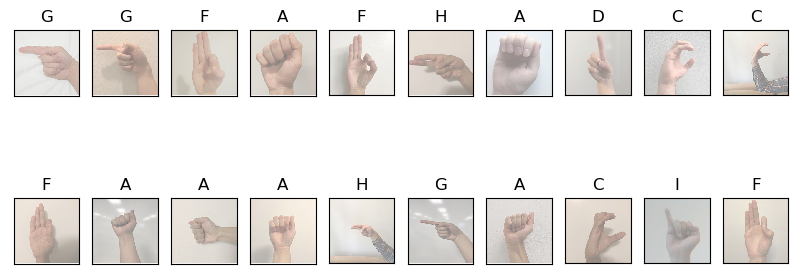

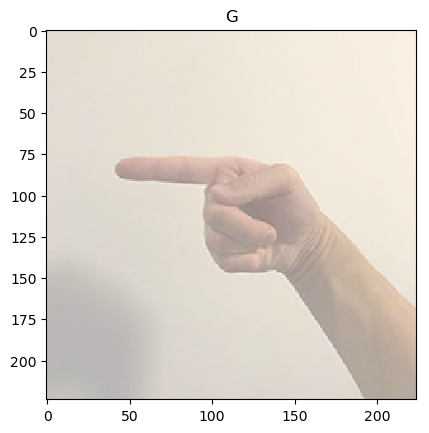

In [4]:
#!/usr/bin/env python  


  
# Define Constants  
IMAGE_SIZE = [224, 224]  
BATCH_SIZE = 32  
TRANSFORM = transforms.Compose([  
    transforms.Resize(IMAGE_SIZE),     
    transforms.ToTensor(),             
])  
  
# Functions  
def load_data(dir_name):  
    dataset = datasets.ImageFolder(root=dir_name, transform=TRANSFORM)    
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)    
    class_names = dataset.classes  
    return dataloader, class_names  
  
def unnormalize_and_convert(img):    
    img = img / 2 + 0.5       
    return img.numpy()    
  
def imshow(img):    
    npimg = unnormalize_and_convert(img)  
    plt.imshow(np.transpose(npimg, (1, 2, 0)))    
  
def get_sample_from_class(class_id, dataloader):    
    while True:    
        images, labels = next(iter(dataloader))    
        for i in range(len(images)):    
            if labels[i] == class_id:    
                return images[i], labels[i]    
  
def plot_images(images, labels, class_names):  
    fig = plt.figure(figsize=(10, 4))  
    for i in np.arange(20):   
        ax = fig.add_subplot(2, 10, i+1, xticks=[], yticks=[])  
        imshow(images[i])    
        ax.set_title(class_names[labels[i]])   
    plt.show()  
  
# Main Script  
def main():  
    dataloader, class_names = load_data('/Users/aordorica/Documents/UofT/MIE 1517/A2/Lab_3b_Gesture_Dataset/train')  
      
    # Display images from a batch  
    images, labels = next(iter(dataloader))    
    plot_images(images, labels, class_names)  
  
    # Get a sample from a specific class and display it  
    class_id = class_names.index('G')    
    sample_image, sample_label = get_sample_from_class(class_id, dataloader)    
    imshow(sample_image)    
    plt.title(class_names[sample_label])    
    plt.show()  
  
if __name__ == "__main__":  
    main()  


The provided code organizes image files into training, validation, and test categories based on their naming format: index_letter_sequence.jpg. This categorization is derived from the prefix index of each filename, directing images to their designated folders (train, val, test) within a central directory. As an example, the '33' in '33_H_22.jpg' determines its classification.

Grouping images by the same index ensures they're placed in a single subset—either training, validation, or test. This grouping is crucial because images with identical indices, albeit with different sequence numbers, may be variations of a single capture. Keeping these variants within one subset avoids potential data leakage. For instance, to prevent a scenario where the model is evaluated on a near-identical version of an image from its training set, the code ensures that all images from the '33' group are in one subset. The underlying assumption is that images with the same index, possibly captured under varied conditions or representing different augmentations of a base photo, share a relationship.

Every index corresponds to photos captured under distinct lighting and hand scenarios. In practical applications, our model would encounter unobserved combinations of these conditions. Hence, it's essential to avoid mixing images of the same lighting and hand conditions between training, validation, and testing. This segregation guarantees our model is tested on genuinely new and varied data, ensuring a robust evaluation.

In [5]:
import os
import shutil
import re

os.chdir("/Users/aordorica/Documents/UofT/MIE 1517/A2/Lab_3b_Gesture_Dataset")
base_dir = '/Users/aordorica/Documents/UofT/MIE 1517/A2/Lab_3b_Gesture_Dataset'


In [6]:
# def split_data(letter):  
#     letter_dir = os.path.join(base_dir, letter)  
    
#     def move_image(src_folder, dest_folder, letter, i):
#         # Pattern to match filenames like '33_H_22.jpg', '22_F_18.jpg', etc.
#         pattern = re.compile(f"^{i}_{letter}_\d+\.jpg$")
        
#         for file_name in os.listdir(src_folder):
#             if pattern.match(file_name):
#                 shutil.move(os.path.join(src_folder, file_name), os.path.join(dest_folder, file_name))

#     for i in range(1, 81):  # For training set  
#         move_image(letter_dir, train_dir, letter, i)  
    
#     for i in range(81, 91):  # For validation set  
#         move_image(letter_dir, val_dir, letter, i)  
          
#     for i in range(91, 150):  # For test set  
#         move_image(letter_dir, test_dir, letter, i)

# # Define paths    
# train_dir = os.path.join(base_dir, 'train')    
# val_dir = os.path.join(base_dir, 'val')    
# test_dir = os.path.join(base_dir, 'test')    
    
# # Make directories if not exist  
# os.makedirs(train_dir, exist_ok=True)    
# os.makedirs(val_dir, exist_ok=True)    
# os.makedirs(test_dir, exist_ok=True)    
  
# # Loop over all letters  
# letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']  # Adjust this according to your dataset  
# for letter in letters:  
#     split_data(letter)  

# Part 2. Model Building and Sanity Checking [5pt]
## Part (i) Convolutional Network [2pt MODEL]
Build a convolutional neural network model that takes the (224x224 RGB) image as input, and predicts the gesture letter. Your model should be a subclass of nn.Module. Explain your choice of neural network architecture: 

how many layers did you choose? What types of layers did you use? Were they fully-connected or convolutional? What about other decisions like pooling layers, activation functions, number of channels / hidden units?


> Let's break down the architecture:

> **Number of layers**

```
1. Convolutional Layer: self.conv1
2. Max-Pooling Layer: self.pool (after conv1)
3. Convolutional Layer: self.conv2
4. Max-Pooling Layer: self.pool (after conv2)
5. Convolutional Layer: self.conv3
6. Max-Pooling Layer: self.pool (after conv3)
7. Convolutional Layer: self.conv4
8. Max-Pooling Layer: self.pool (after conv4)
9. Fully Connected (dense) Layer: self.fc1
10. Dropout Layer: self.dropout
11. Fully Connected (dense) Layer: self.fc2
```

So, there are a total of 11 layers in this architecture.

> **Types of layers/ Convolutional vs Fully Connected**
Convolutional layers share weights across spatial locations and uses the same weights for all positions in an input image, whereas a fully connected layer requires every neuron to be connected to every other neuron in the preceding and following layers, leading to a huge number of parameters, especially for high resolution images. In addition, CNNs exploit the local spatial correlations in images, whereas fully connected layers do not because they treat the input as a flat vector, which might lose crucial spatial hierarchies in the data. These spatial hierarchies may give rise to patterns like textures and edges, which CNNs are very good at detecting. 
Once a CNN has learned to recognize a pattern in one location it can recognize it in any other location. In contrast, once a fully connected network has learned to recognize a pattern in one location, it can only recognize it in that particular location. However, we still use a FC layer at the end for classification purposes so that we can adjust the size of the output to match the number of classes (in classification tasks).  


> **Activation Functions**
The RELU activation is applied five times in the network. The presence of this non-linear activation function allows the network to learn non-linear representations and complex mappings from inputs to outputs. 

> **Pooling**

> In this case, we're using max pooling because it is the most common type of pooling layer in CNNs, especially in architectures like VGG, as it usually works well. Max Pooling captures the most prominent feature from the local region due to its max operation. It provides a form of translation invariance, which can be beneficial for some tasks. However, it discards other pixel values in the region, potentially losing information. By inserting a max pooling layer every few layers in a CNN, it is possible to get some level of translation invariance at a larger scale. Moreover, max pooling offers a small amount of rotational invariance and a slight scale invariance. Such invariance (even if it is limited) can be useful in cases where the prediction should not depend on these details, such as in classification tasks. Max Pooling should not be used in semantic segmentation but that is not an issue in this case. 

> The other common option is Average Pooling, which takes the average of the values in the region, so it retains more information than max pooling. However, due to its nature of smoothing, it might blur the features, making them less distinctive. This can be good if we want to reduce the risk of overfitting relative to max pooling, since max pooling will be more susceptible to capturing noise. 


> **Number of Channels and Hidden Units**
As we can see from the code below, for the Convolutional Layers: 
```
conv1:
  Input Channels: 3
  Output Channels: 32
conv2:
  Input Channels: 32
  Output Channels: 64
conv3:
  Input Channels: 64
  Output Channels: 128
conv4:
  Input Channels: 128
  Output Channels: 256
```

For the Fully Connected Layers: 
```
fc1:
  Input Features (Hidden Units for previous layer): 50176 
  Output Features (Hidden Units): 512
fc2:
  Input Features (Hidden Units for previous layer): 512
  Output Features (Hidden Units): 9

GestureRecognitionCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=50176, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=9, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (relu): ReLU()
)
```

Adding biases into account: 
```
conv1:
  Input Channels: 3
  Output Channels: 32
conv2:
  Input Channels: 32
  Output Channels: 64
conv3:
  Input Channels: 64
  Output Channels: 128
conv4:
  Input Channels: 128
  Output Channels: 256
fc1:
  Input Features (Hidden Units for previous layer): 50176
  Output Features (Hidden Units): 512
fc2:
  Input Features (Hidden Units for previous layer): 512
  Output Features (Hidden Units): 9
Total channels: 480
Total neurons: 521
Total biases: 1001
```

* Num of channels = output channels from each convolutional layer --> 32+ 64+ 128 + 256 = 480
* Num of neurons = output channels from each fully connected layer --> 512+9 = 521 




Note that Input units from the flattened feature maps come from 256 channels in the last convolutional layer * 14 weight * 14 width = 50176. 


Including biases, the architecture consists of:

* 480 channels
* 512 hidden units (neurons) in the fully connected layers (excluding the output layer)
* Total elements (channels + hidden units + biases) = 480 + 512 + 1001 = 1993.

However, if you're referring to the term "hidden units" as encompassing both channels and neurons in fully connected layers, then:

* Total hidden units = 480 (channels) + 512 (neurons) = 992 hidden units (excluding biases).

In [7]:
ls

model_checkpoint.pth  train/
test/                 val/


In [8]:
# len(os.listdir('Lab_3b_Gesture_Dataset/train/A'))

In [9]:
from sklearn.metrics import confusion_matrix
import numpy as np


def compute_per_class_accuracy_df(model, data_loader, device):
    true_labels = []
    predicted_labels = []

    model.eval()
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            
            outputs = model(images)
            _, predictions = torch.max(outputs, 1)

            true_labels.extend(labels.cpu().numpy())
            predicted_labels.extend(predictions.cpu().numpy())

    conf_matrix = confusion_matrix(true_labels, predicted_labels)
    class_accuracies = conf_matrix.diagonal() / conf_matrix.sum(axis=1)
    
    num_classes = conf_matrix.shape[0]
    
    # Convert accuracies to DataFrame
    df = pd.DataFrame({
        'Letter': [chr(65 + i) for i in range(num_classes)],
        'Accuracy': class_accuracies
    })

    return df


def predict_and_display(image_path, model, device):
    # Function to preprocess image
    def preprocess_image(image_path):
        transform = transforms.Compose([
            transforms.Resize((224, 224)),  # Assuming this is the size you trained on
            transforms.ToTensor(),
            # Add any other transformations that were used in the training dataset
            # For example, if you normalized your images during training, add that transform here
            # transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
        ])
        image = Image.open(image_path).convert('RGB')
        image = transform(image).unsqueeze(0)  # Add batch dimension
        return image

    # Preprocess the image
    image_tensor = preprocess_image(image_path)
    image_tensor = image_tensor.to(device)

    # Ensure the model is in evaluation mode
    model.eval()

    # Get predictions
    with torch.no_grad():
        outputs = model(image_tensor)
        probabilities = F.softmax(outputs, dim=1)
        predicted_class = torch.argmax(probabilities, dim=1).item()

    # Map the predicted index to the corresponding letter
    index_to_letter = {i: chr(65 + i) for i in range(26)}  # Example mapping for A-Z
    predicted_letter = index_to_letter[predicted_class]

    # Display the image with predicted value on top
    image = Image.open(image_path).convert('RGB')
    plt.imshow(image)
    plt.title(f"Predicted Letter: {predicted_letter}")
    plt.axis('off')  # Hide axis values
    plt.show()



def print_model_details(model):
    for name, module in model.named_modules():
        if isinstance(module, nn.Conv2d):
            print(f"{name}:")
            print(f"  Input Channels: {module.in_channels}")
            print(f"  Output Channels: {module.out_channels}")
        elif isinstance(module, nn.Linear):
            print(f"{name}:")
            print(f"  Input Features (Hidden Units for previous layer): {module.in_features}")
            print(f"  Output Features (Hidden Units): {module.out_features}")

            
def count_parameters(model):
    total_channels = 0
    total_neurons = 0
    total_biases = 0

    for name, param in model.named_parameters():
        if 'conv' in name and 'weight' in name:
            total_channels += param.size(0)
        if 'fc' in name and 'weight' in name:
            total_neurons += param.size(0)
        if 'bias' in name:
            total_biases += param.numel()

    return total_channels, total_neurons, total_biases



/Users/aordorica/opt/anaconda3/envs/pytorchenv/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


## Part (ii) Training Code [2pt MODEL]
Write code that trains your neural network given some training data. Your training code should make it easy to tweak the usual hyperparameters, like batch size, learning rate, and the model object itself. Make sure that you are checkpointing your models from time to time (the frequency is up to you). Explain your choice of loss function and optimizer.


> We're using Cross-Entropy loss because it's the commonly used one for classification tasks. 
> We're using the Adam optimizer because it has been shown to work well across many deep learning architectures and tasks. Another one we could use is SGD. Adam's main advantages include being relatively low on memory requirements and working well despite little to no hyperparameter tuning. 

### Architecture 1

In [10]:
NUM_CLASSES = 9
class GestureRecognitionCNN(nn.Module):
    def __init__(self, num_classes=NUM_CLASSES):
        super(GestureRecognitionCNN, self).__init__()
        
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)

        # Pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        # Fully connected layers
        self.fc1 = nn.Linear(256 * 14 * 14, 512)
        self.fc2 = nn.Linear(512, num_classes)

        # Dropout
        self.dropout = nn.Dropout(0.5)

        # Activation function
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = self.pool(self.relu(self.conv4(x)))

        # Flatten
        x = x.view(-1, 256 * 14 * 14)

        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


#### Reorganizing in subfolders

In [11]:
# import os
# files = os.listdir("Lab_3b_Gesture_Dataset/val")
# files.sort()


# import os
# import shutil

# # Assuming all your images are in this directory
# src_dir = 'Lab_3b_Gesture_Dataset/val'

# # List all files
# files = [f for f in os.listdir(src_dir) if os.path.isfile(os.path.join(src_dir, f))]

# for file in files:
#     # Extract the label from the filename
#     label = file.split('_')[-2]
    
#     # Destination directory
#     dst_dir = os.path.join(src_dir, label)
    
#     # Create the label directory if it doesn't exist
#     if not os.path.exists(dst_dir):
#         os.makedirs(dst_dir)
    
#     # Move the file to the destination directory
#     shutil.move(os.path.join(src_dir, file), os.path.join(dst_dir, file))

# print("Organizing done!")

In [12]:
pwd

'/Users/aordorica/Documents/UofT/MIE 1517/A2/Lab_3b_Gesture_Dataset'

#### Loading the dataset with pytorch

In [13]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize to [-1, 1] range
])


In [14]:


# Initialize the model
# model = GestureRecognitionCNN()



#### Setting up torch to be able to leverage the GPU in Apple m1 max chip

In [15]:

if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")

tensor([1.], device='mps:0')


/Users/aordorica/opt/anaconda3/envs/pytorchenv/lib/python3.7/site-packages/torch/_tensor_str.py:116: UserWarning: The operator 'aten::nonzero' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/mps/MPSFallback.mm:11.)
  tensor_view, torch.isfinite(tensor_view) & tensor_view.ne(0)


#### Setting up Model, Loss, and Optimizer

In [16]:
model = GestureRecognitionCNN(num_classes=NUM_CLASSES)

print_model_details(model)


# Count parameters
channels, neurons, biases = count_parameters(model)

print(f"Total channels: {channels}")
print(f"Total neurons: {neurons}")
print(f"Total biases: {biases}")


# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"PyTorch version: {torch.__version__}")

# Check PyTorch has access to MPS (Metal Performance Shader, Apple's GPU architecture)
print(f"Is MPS (Metal Performance Shader) built? {torch.backends.mps.is_built()}")
print(f"Is MPS available? {torch.backends.mps.is_available()}")

# Set the device      
device = "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using device: {device}")

print("CUDA Available:", torch.cuda.is_available())
print("Model device:", next(model.parameters()).device)
# print(torch.cuda.get_device_name(0))
# As expected, since CUDA is NVIDIA's GPU platform and Apple's M1 Max chip doesn't support it. Instead, Apple uses MPS.

model = model.to(device)
print(model)

conv1:
  Input Channels: 3
  Output Channels: 32
conv2:
  Input Channels: 32
  Output Channels: 64
conv3:
  Input Channels: 64
  Output Channels: 128
conv4:
  Input Channels: 128
  Output Channels: 256
fc1:
  Input Features (Hidden Units for previous layer): 50176
  Output Features (Hidden Units): 512
fc2:
  Input Features (Hidden Units for previous layer): 512
  Output Features (Hidden Units): 9
Total channels: 480
Total neurons: 521
Total biases: 1001
PyTorch version: 1.13.1
Is MPS (Metal Performance Shader) built? True
Is MPS available? True
Using device: mps
CUDA Available: False
Model device: cpu
GestureRecognitionCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, di

#### Training Loop

In [17]:

# Load datasets

train_dataset = datasets.ImageFolder(root='train', transform=transform)
val_dataset = datasets.ImageFolder(root='val', transform=transform)


def train_model(model, train_data, val_data, epochs=10, batch_size=32, lr=0.001, checkpoint_freq=5, save_path='model_checkpoint.pth'):
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    
    # Define the loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    device = "mps" if torch.backends.mps.is_available() else "cpu"
    model = model.to(device)
    
    training_losses = []
    validation_losses = []

    for epoch in range(epochs):
        model.train()
        total_train_loss = 0.0

        for batch_idx, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            total_train_loss += loss.item()

        avg_train_loss = total_train_loss / len(train_loader)
        training_losses.append(avg_train_loss)

        # Validation loss
        model.eval()
        total_val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                total_val_loss += loss.item()

        avg_val_loss = total_val_loss / len(val_loader)
        validation_losses.append(avg_val_loss)

        print(f"Epoch [{epoch+1}/{epochs}], Training Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}")

        # Checkpointing the model
        if (epoch+1) % checkpoint_freq == 0:
            torch.save(model.state_dict(), save_path)
            print(f"Model checkpoint saved to {save_path}")

    print("Training complete!")

    return training_losses, validation_losses
    
    

model = GestureRecognitionCNN()

training_losses, validation_losses = train_model(
    model=model,
    train_data=train_dataset,
    val_data=val_dataset,
    epochs=10,
    batch_size=64,
    lr=0.001,
    checkpoint_freq=10
)



Epoch [1/10], Training Loss: 1.7358, Validation Loss: 1.1097
Epoch [2/10], Training Loss: 1.1277, Validation Loss: 0.8833
Epoch [3/10], Training Loss: 0.8119, Validation Loss: 0.6278
Epoch [4/10], Training Loss: 0.5848, Validation Loss: 0.5840
Epoch [5/10], Training Loss: 0.4442, Validation Loss: 0.4709
Epoch [6/10], Training Loss: 0.3055, Validation Loss: 0.4771
Epoch [7/10], Training Loss: 0.2123, Validation Loss: 0.4245
Epoch [8/10], Training Loss: 0.1869, Validation Loss: 0.4538
Epoch [9/10], Training Loss: 0.1369, Validation Loss: 0.4794
Epoch [10/10], Training Loss: 0.1341, Validation Loss: 0.3799
Model checkpoint saved to model_checkpoint.pth
Training complete!


#### Loss Plot

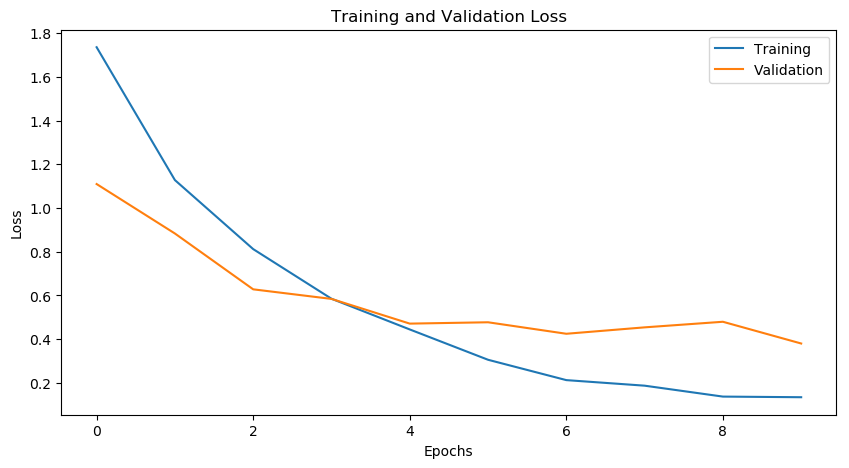

In [18]:
plt.figure(figsize=(10,5))
plt.title("Training and Validation Loss")
plt.plot(training_losses,label="Training")
plt.plot(validation_losses,label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Running inference on a few samples and displaying them

In [19]:
pwd

'/Users/aordorica/Documents/UofT/MIE 1517/A2/Lab_3b_Gesture_Dataset'

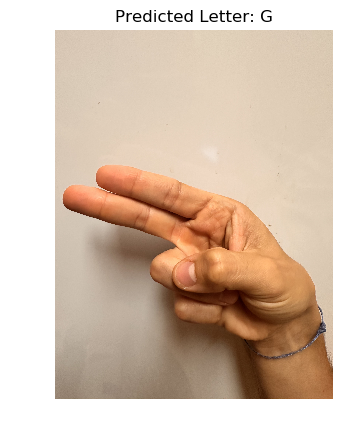

In [20]:
# Test the function
image_path = "../h2.jpg"
predict_and_display(image_path, model, device)

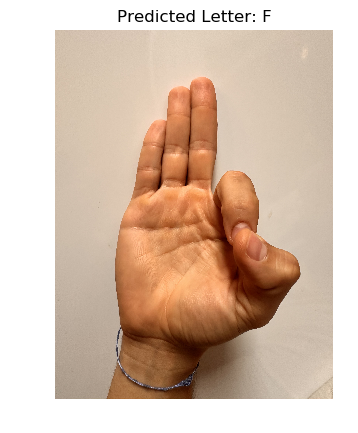

In [21]:

# Test the function
image_path = "../f1.jpg"
predict_and_display(image_path, model, device)


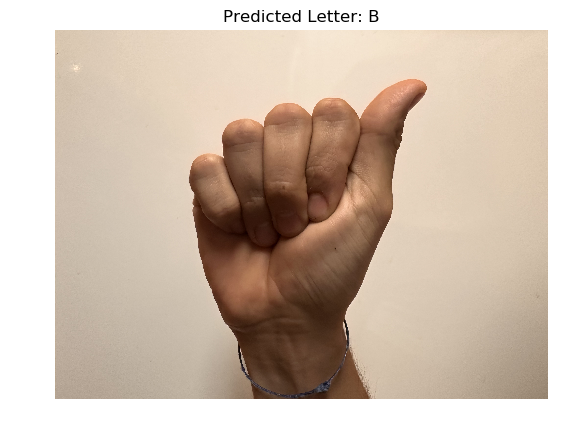

In [22]:

# Test the function
image_path = "../a2.jpg"
predict_and_display(image_path, model, device)


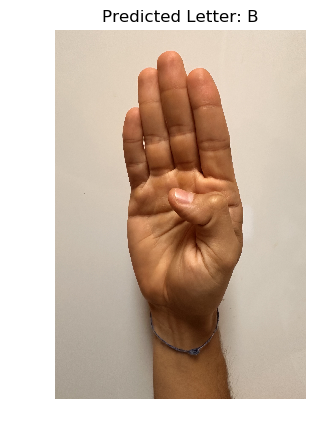

In [23]:

# Test the function
image_path = "../b3.jpg"
predict_and_display(image_path, model, device)


In [24]:
# Create the DataFrame

val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)
accuracy_df = compute_per_class_accuracy_df(model, val_loader, device)

# Display with style
styled_df = accuracy_df.style.bar(subset=['Accuracy'], align='mid', color=['red', 'lightgreen'])
styled_df


,Letter,Accuracy
0,A,0.923077
1,B,1
2,C,0.814815
3,D,0.962963
4,E,0.740741
5,F,0.851852
6,G,0.814815
7,H,0.962963
8,I,0.875


In [25]:
print(accuracy_df)

  Letter  Accuracy
0      A  0.923077
1      B  1.000000
2      C  0.814815
3      D  0.962963
4      E  0.740741
5      F  0.851852
6      G  0.814815
7      H  0.962963
8      I  0.875000


## Part (iii) “Overfit” to a Small Dataset - [1pt MODEL]
One way to sanity check our neural network model and training code is to check whether the model is capable of “overfitting” or “memorizing” a small dataset. A properly constructed CNN with correct training code should be able to memorize the answers to a small number of images quickly.

Construct a small dataset (e.g. just the images that you have collected). Then show that your model and training code is capable of memorizing the labels of this small data set.

With a large batch size (e.g. the entire small dataset) and learning rate that is not too high, you should be able to obtain a 100% training accuracy on that small dataset relatively quickly (within 200 iterations).

> As we can see on the plot below, the training loss seems to be decreasing as the number of epochs increases. This indicates that the model is learning from the training data. 
As expected, the validation loss exhibits more fluctuations and does not show a consistent decreasing trend. After a certain number of epochs, the validation loss starts to increase, suggesting that the model might be overfitting to the training data.

In [26]:
from PIL import Image
Image.MAX_IMAGE_PIXELS = None

def check_and_resize_images(directory, target_size=(224, 224)):
    for subdir, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(subdir, file)
            try:
                with Image.open(file_path) as img:
                    if img.size != target_size:
                        print(f"Resizing image {file_path} from {img.size} to {target_size}")
                        img = img.resize(target_size)
                        img.save(file_path)
            except Exception as e:
                print(f"Error processing {file_path}: {e}")

# Set your directory path
image_directory = '../images'
check_and_resize_images(image_directory)


In [27]:
# import os
# import shutil

# src_directory = '../images'
# dst_directory = '../images_organized'

# if not os.path.exists(dst_directory):
#     os.makedirs(dst_directory)

# for image_file in os.listdir(src_directory):
#     # Check if the file is an image by checking its extension (here, we assume jpg but you can add others)
#     if image_file.endswith('.jpg'):
#         # Get the first character of the filename to use as folder name
#         folder_name = image_file[0].upper()

#         # Create the folder if it doesn't exist
#         folder_path = os.path.join(dst_directory, folder_name)
#         if not os.path.exists(folder_path):
#             os.makedirs(folder_path)

#         # Move the image to the new folder
#         src_path = os.path.join(src_directory, image_file)
#         dst_path = os.path.join(folder_path, image_file)
#         shutil.move(src_path, dst_path)

# print("Images have been reorganized!")


In [28]:
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

    
# Assuming images are stored in a folder named 'data'
# and the sub-folders inside 'data' represent class names

transform = transforms.Compose([
    transforms.Resize((224, 224)), # Resize to fit the expected input size of the network
    transforms.ToTensor(),
])

# Load the dataset
dataset = datasets.ImageFolder(root='../images', transform=transform)

# Split the dataset into training and validation sets
train_size = 60
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=len(train_dataset), shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=len(val_dataset), shuffle=False)


model_overfit = GestureRecognitionCNN()

training_losses_overfit, validation_losses_overfit = train_model(
    model=model_overfit,
    train_data=train_dataset,
    val_data=val_dataset,
    epochs=100,
    batch_size=60,
    lr=0.001,
    checkpoint_freq=10
)


Epoch [1/100], Training Loss: 0.8412, Validation Loss: 1.1052
Epoch [2/100], Training Loss: 0.8491, Validation Loss: 0.7119
Epoch [3/100], Training Loss: 0.8561, Validation Loss: 0.5810
Epoch [4/100], Training Loss: 0.8349, Validation Loss: 0.5766
Epoch [5/100], Training Loss: 0.8225, Validation Loss: 0.6252
Epoch [6/100], Training Loss: 0.8152, Validation Loss: 0.6939
Epoch [7/100], Training Loss: 0.8137, Validation Loss: 0.7061
Epoch [8/100], Training Loss: 0.8008, Validation Loss: 0.7014
Epoch [9/100], Training Loss: 0.7449, Validation Loss: 0.7387
Epoch [10/100], Training Loss: 0.7353, Validation Loss: 0.7046
Model checkpoint saved to model_checkpoint.pth
Epoch [11/100], Training Loss: 0.6352, Validation Loss: 0.7306
Epoch [12/100], Training Loss: 0.5547, Validation Loss: 0.7137
Epoch [13/100], Training Loss: 0.4588, Validation Loss: 0.6817
Epoch [14/100], Training Loss: 0.2978, Validation Loss: 0.6720
Epoch [15/100], Training Loss: 0.2713, Validation Loss: 0.6056
Epoch [16/100], T

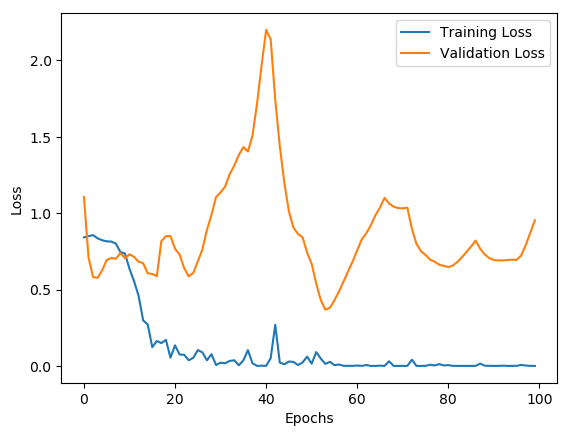

In [29]:


plt.plot(training_losses_overfit, label="Training Loss")
plt.plot(validation_losses_overfit, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [30]:
os.getcwd()

'/Users/aordorica/Documents/UofT/MIE 1517/A2/Lab_3b_Gesture_Dataset'

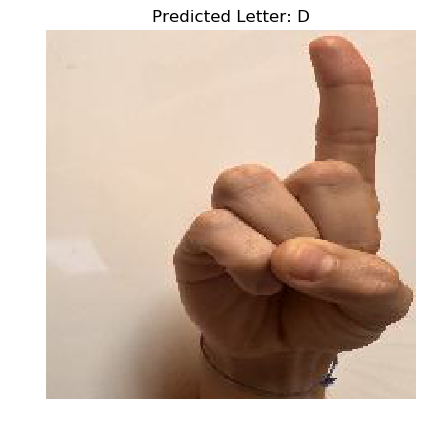

In [31]:
# Assuming you have a function `predict_and_display` similar to what you've shown earlier

# Pick a sample image from the training dataset
sample_index = 10  # Change this index to test different images
sample_image_path, sample_label = train_dataset.dataset.samples[sample_index]

# Predict and display
predict_and_display(sample_image_path, model_overfit, device)


In [32]:
# sample_index = 10 
# sample_image_path, sample_label = train_dataset.samples[sample_index]
# predict_and_display(sample_image_path, model_overfit, device, sample_label)

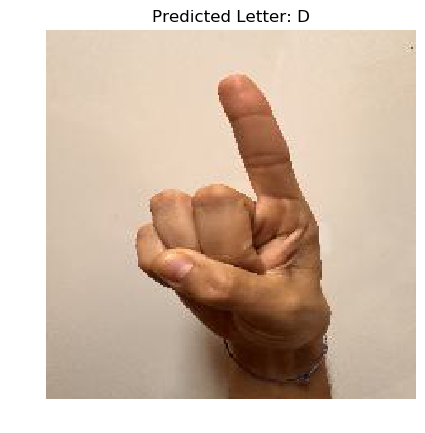

In [33]:
# Assuming you have a function `predict_and_display` similar to what you've shown earlier

# Pick a sample image from the training dataset
sample_index = 11  # Change this index to test different images
sample_image_path, sample_label = train_dataset.dataset.samples[sample_index]

# Predict and display
predict_and_display(sample_image_path, model_overfit, device)


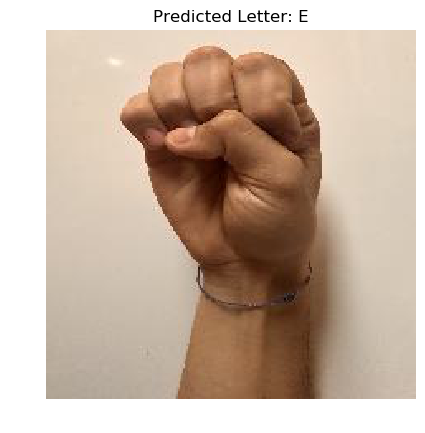

In [34]:
# Assuming you have a function `predict_and_display` similar to what you've shown earlier

# Pick a sample image from the training dataset
sample_index = 14  # Change this index to test different images
sample_image_path, sample_label = train_dataset.dataset.samples[sample_index]

# Predict and display
predict_and_display(sample_image_path, model_overfit, device)


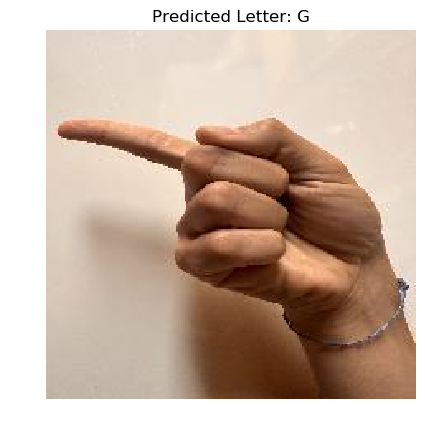

In [35]:
# Assuming you have a function `predict_and_display` similar to what you've shown earlier

# Pick a sample image from the training dataset
sample_index = 20  # Change this index to test different images
sample_image_path, sample_label = train_dataset.dataset.samples[sample_index]

# Predict and display
predict_and_display(sample_image_path, model_overfit, device)


# Part 3. Hyperparameter Search [7pt]
## Part (i) - [2pt EXPLORATORY]

List 3 hyperparameters that you think are most worth tuning. Choose at least one hyperparameter related to the model architecture.

* V2 will have one less layer (3 in total)
* V3 will have one more layer than original (5 in total)
* V4 will have 5 total layers + regularization
* V5 will be the same as V4 but with a smaller learning rate 



### Model Variation 1: Less layers 

#### Model Definition

In [36]:
class GestureRecognitionCNN_v2(nn.Module):
    def __init__(self, num_classes=9):
        super(GestureRecognitionCNN_v2, self).__init__()
        
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)

        # Pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        # Fully connected layers
        # Adjust the input dimension of the first fully connected layer
        self.fc1 = nn.Linear(128 * 28 * 28, 512) 
        self.fc2 = nn.Linear(512, num_classes)

        # Dropout
        self.dropout = nn.Dropout(0.5)

        # Activation function
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))

        # Flatten
        # Adjust the reshaping step as well
        x = x.view(-1, 128 * 28 * 28)

        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


#### Training Loop

In [37]:

model_v2= GestureRecognitionCNN_v2()

training_losses_v2, validation_losses_v2 = train_model(
    model=model_v2,
    train_data=train_dataset,
    val_data=val_dataset,
    epochs=10,
    batch_size=64,
    lr=0.001,
    checkpoint_freq=10
)




Epoch [1/10], Training Loss: 0.8401, Validation Loss: 1.9193
Epoch [2/10], Training Loss: 1.4594, Validation Loss: 1.1668
Epoch [3/10], Training Loss: 1.1403, Validation Loss: 0.7617
Epoch [4/10], Training Loss: 0.8930, Validation Loss: 0.6230
Epoch [5/10], Training Loss: 0.8356, Validation Loss: 0.5967
Epoch [6/10], Training Loss: 0.8142, Validation Loss: 0.6038
Epoch [7/10], Training Loss: 0.7799, Validation Loss: 0.6445
Epoch [8/10], Training Loss: 0.7698, Validation Loss: 0.6591
Epoch [9/10], Training Loss: 0.7384, Validation Loss: 0.6976
Epoch [10/10], Training Loss: 0.7017, Validation Loss: 0.7179
Model checkpoint saved to model_checkpoint.pth
Training complete!


#### Loss Plots 

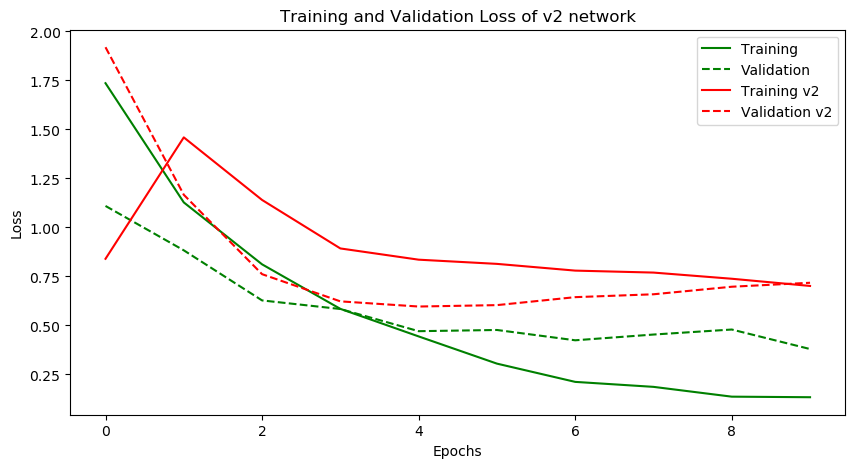

In [38]:
plt.figure(figsize=(10,5))
plt.title("Training and Validation Loss of v2 network")

plt.plot(training_losses,label="Training", color='green')
plt.plot(validation_losses,label="Validation", color='green', linestyle='--')

plt.plot(training_losses_v2,label="Training v2", color='red')
plt.plot(validation_losses_v2,label="Validation v2", color='red', linestyle='--')

# plt.plot(training_losses_v3,label="Training v3", color='orange')
# plt.plot(validation_losses_v3,label="Validation v3", color='orange', linestyle='--')


plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


### Model Variation 2 - More Layers 

In [39]:
class GestureRecognitionCNN_v3(nn.Module):
    def __init__(self, num_classes=NUM_CLASSES):
        super(GestureRecognitionCNN_v3, self).__init__()
        
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.conv5 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1)

        # Pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        # Fully connected layers
        # Adjust the size for flattening. If using a pooling layer after every conv layer, the size will be halved with each pooling.
        self.fc1 = nn.Linear(512 * 7 * 7, 512)
        self.fc2 = nn.Linear(512, num_classes)

        # Dropout
        self.dropout = nn.Dropout(0.5)

        # Activation function
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = self.pool(self.relu(self.conv4(x)))
        x = self.pool(self.relu(self.conv5(x)))   # Adding the fifth convolutional layer to the forward pass

        # Flatten
        x = x.view(-1, 512 * 7 * 7)

        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


In [40]:

model_v3= GestureRecognitionCNN_v3()

training_losses_v3, validation_losses_v3 = train_model(
    model=model_v3,
    train_data=train_dataset,
    val_data=val_dataset,
    epochs=10,
    batch_size=64,
    lr=0.001,
    checkpoint_freq=10
)


Epoch [1/10], Training Loss: 0.8418, Validation Loss: 0.6395
Epoch [2/10], Training Loss: 0.8331, Validation Loss: 0.6305
Epoch [3/10], Training Loss: 0.8436, Validation Loss: 0.5871
Epoch [4/10], Training Loss: 0.8360, Validation Loss: 0.5935
Epoch [5/10], Training Loss: 0.8392, Validation Loss: 0.5999
Epoch [6/10], Training Loss: 0.8333, Validation Loss: 0.6226
Epoch [7/10], Training Loss: 0.8339, Validation Loss: 0.6410
Epoch [8/10], Training Loss: 0.8254, Validation Loss: 0.6807
Epoch [9/10], Training Loss: 0.8275, Validation Loss: 0.6831
Epoch [10/10], Training Loss: 0.7835, Validation Loss: 0.7856
Model checkpoint saved to model_checkpoint.pth
Training complete!


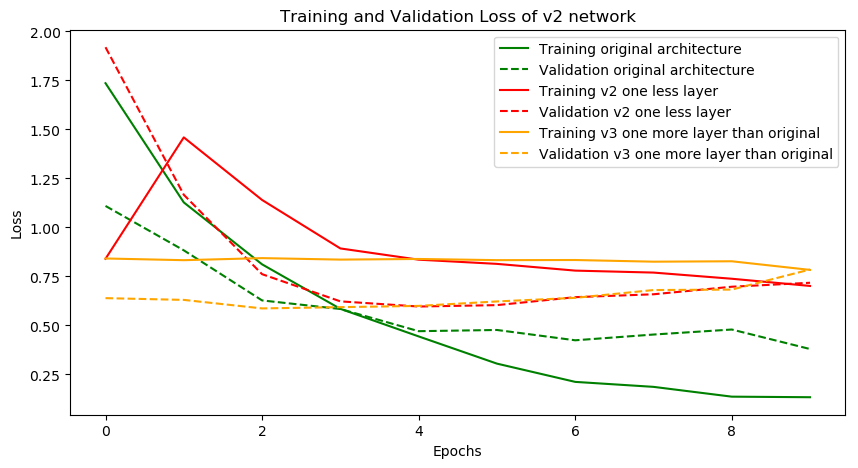

In [41]:
plt.figure(figsize=(10,5))
plt.title("Training and Validation Loss of v2 network")

plt.plot(training_losses,label="Training original architecture", color='green')
plt.plot(validation_losses,label="Validation original architecture", color='green', linestyle='--')

plt.plot(training_losses_v2,label="Training v2 one less layer", color='red')
plt.plot(validation_losses_v2,label="Validation v2 one less layer", color='red', linestyle='--')

plt.plot(training_losses_v3,label="Training v3 one more layer than original", color='orange')
plt.plot(validation_losses_v3,label="Validation v3 one more layer than original", color='orange', linestyle='--')

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


### Model Variation 3 - Original Architecture with Regularization

In [42]:
NUM_CLASSES = 9
class GestureRecognitionCNN_v4(nn.Module):
    def __init__(self, num_classes=NUM_CLASSES):
        super(GestureRecognitionCNN_v4, self).__init__()
        
        # Convolutional layers with Batch Normalization
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        
        self.conv5 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1)
        self.bn5 = nn.BatchNorm2d(512)
        
        # Pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        # Fully connected layers
        self.fc1 = nn.Linear(512 * 7 * 7, 512)
        self.fc2 = nn.Linear(512, num_classes)

        # Dropout
        self.dropout = nn.Dropout(0.5)

        # Activation function
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.bn1(self.conv1(x))))
        x = self.pool(self.relu(self.bn2(self.conv2(x))))
        x = self.pool(self.relu(self.bn3(self.conv3(x))))
        x = self.pool(self.relu(self.bn4(self.conv4(x))))
        x = self.pool(self.relu(self.bn5(self.conv5(x))))

        # Flatten
        x = x.view(-1, 512 * 7 * 7)

        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x



def train_model_v4(model, train_data, val_data, epochs=10, batch_size=32, lr=0.001, weight_decay=0, checkpoint_freq=5, save_path='model_checkpoint.pth'):
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    
    # Define the loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    
    # device = "mps" if torch.backends.mps.is_available() else "cpu"
    model = model.to(device)
    
    training_losses = []
    validation_losses = []

    for epoch in range(epochs):
        model.train()
        total_train_loss = 0.0

        for batch_idx, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            total_train_loss += loss.item()

        avg_train_loss = total_train_loss / len(train_loader)
        training_losses.append(avg_train_loss)

        # Validation loss
        model.eval()
        total_val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                total_val_loss += loss.item()

        avg_val_loss = total_val_loss / len(val_loader)
        validation_losses.append(avg_val_loss)

        print(f"Epoch [{epoch+1}/{epochs}], Training Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}")

        # Checkpointing the model
        if (epoch+1) % checkpoint_freq == 0:
            torch.save(model.state_dict(), save_path)
            print(f"Model checkpoint saved to {save_path}")

    print("Training complete!")

    return training_losses, validation_losses
    
    
    
model_v4= GestureRecognitionCNN_v4()

training_losses_v4, validation_losses_v4 = train_model_v4(
    model=model_v4,
    train_data=train_dataset,
    val_data=val_dataset,
    epochs=10,
    batch_size=64,
    lr=0.001,
    weight_decay=0.0001,
    checkpoint_freq=10
)



Epoch [1/10], Training Loss: 0.8554, Validation Loss: 0.6017
Epoch [2/10], Training Loss: 3.2987, Validation Loss: 0.7382
Epoch [3/10], Training Loss: 4.1024, Validation Loss: 0.8304
Epoch [4/10], Training Loss: 3.1202, Validation Loss: 0.8298
Epoch [5/10], Training Loss: 1.9770, Validation Loss: 0.8065
Epoch [6/10], Training Loss: 1.8242, Validation Loss: 0.7554
Epoch [7/10], Training Loss: 0.6599, Validation Loss: 0.7140
Epoch [8/10], Training Loss: 0.4621, Validation Loss: 0.6541
Epoch [9/10], Training Loss: 0.7497, Validation Loss: 0.6231
Epoch [10/10], Training Loss: 0.6150, Validation Loss: 0.6984
Model checkpoint saved to model_checkpoint.pth
Training complete!


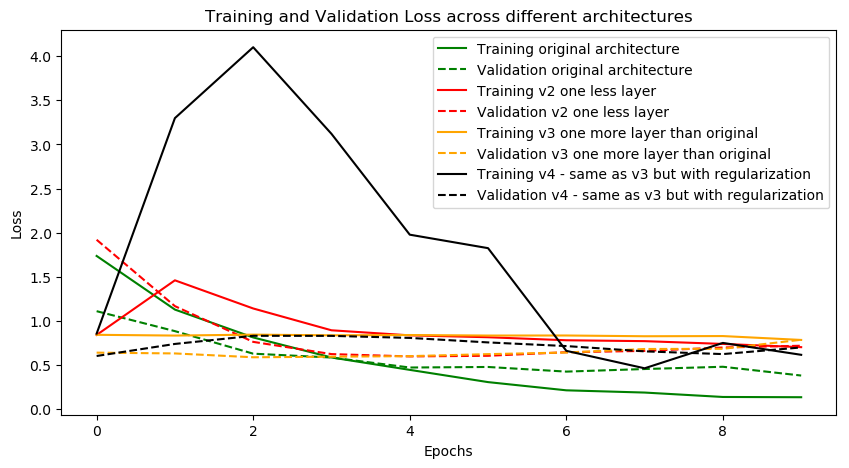

In [43]:
plt.figure(figsize=(10,5))
plt.title("Training and Validation Loss across different architectures")

plt.plot(training_losses,label="Training original architecture", color='green')
plt.plot(validation_losses,label="Validation original architecture", color='green', linestyle='--')

plt.plot(training_losses_v2,label="Training v2 one less layer", color='red')
plt.plot(validation_losses_v2,label="Validation v2 one less layer", color='red', linestyle='--')

plt.plot(training_losses_v3,label="Training v3 one more layer than original", color='orange')
plt.plot(validation_losses_v3,label="Validation v3 one more layer than original", color='orange', linestyle='--')


plt.plot(training_losses_v4,label="Training v4 - same as v3 but with regularization", color='black')
plt.plot(validation_losses_v4,label="Validation v4 - same as v3 but with regularization", color='black', linestyle='--')

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [44]:
# Create the DataFrame

val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)
accuracy_df_v1 = compute_per_class_accuracy_df(model, val_loader, device)

val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)
accuracy_df_v2 = compute_per_class_accuracy_df(model_v2, val_loader, device)

val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)
accuracy_df_v3 = compute_per_class_accuracy_df(model_v3, val_loader, device)

val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)
accuracy_df_v4 = compute_per_class_accuracy_df(model_v4, val_loader, device)

merged_df = accuracy_df_v1.merge(accuracy_df_v2, on='Letter', suffixes=('_v1', '_v2')) \
              .merge(accuracy_df_v3, on='Letter', suffixes=('', '_v3')) \
              .merge(accuracy_df_v4, on='Letter', suffixes=('', '_v4'))
merged_df.style.bar(subset=['Accuracy', 'Accuracy_v1','Accuracy_v2', 'Accuracy_v3', 'Accuracy_v4'], align='mid', color=['red', 'lightgreen'])

/Users/aordorica/opt/anaconda3/envs/pytorchenv/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/Users/aordorica/opt/anaconda3/envs/pytorchenv/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,Letter,Accuracy_v1,Accuracy_v2,Accuracy,Accuracy_v4
0,A,nan,0,0,0
1,B,0.5,nan,nan,nan
2,C,nan,0,0,0
3,D,0,nan,0,0
4,E,nan,0,nan,0
5,F,1,nan,0,0
6,G,nan,nan,0,0
7,H,0,0,0,0
8,I,0,0,0,0
9,J,0,0,0,0


ValueError: cannot convert float NaN to integer

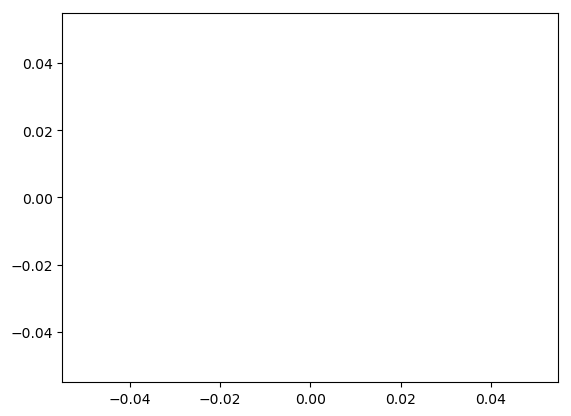

In [45]:
import seaborn as sns

sns.distplot(accuracy_df_v1['Accuracy'], label='original model')

sns.distplot(accuracy_df_v2['Accuracy'], label='v2')

sns.distplot(accuracy_df_v3['Accuracy'], label='v3')

sns.distplot(accuracy_df_v4['Accuracy'], label='v4')
plt.title("Accuracy across multiple letters")
plt.legend()

### Model Variation 4 - same as varation 3 with slower learning rate

In [ ]:

    
model_v5= GestureRecognitionCNN_v4()

training_losses_v5, validation_losses_v5 = train_model_v4(
    model=model_v5,
    train_data=train_dataset,
    val_data=val_dataset,
    epochs=10,
    batch_size=64,
    lr=0.0001,
    weight_decay=0.0001,
    checkpoint_freq=10
)



## Part (ii) - [1pt MODEL]
Tune the hyperparameters you listed in Part (i), trying as many values as you need to until you feel satisfied that you are getting a good model. Plot the training curve of at least 4 different hyperparameter settings.

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Training and Validation Loss across different architectures")

plt.plot(training_losses,label="Training original architecture", color='green')
plt.plot(validation_losses,label="Validation original architecture", color='green', linestyle='--')

plt.plot(training_losses_v2,label="Training v2 one less layer", color='red')
plt.plot(validation_losses_v2,label="Validation v2 one less layer", color='red', linestyle='--')

plt.plot(training_losses_v3,label="Training v3 one more layer than original", color='orange')
plt.plot(validation_losses_v3,label="Validation v3 one more layer than original", color='orange', linestyle='--')


plt.plot(training_losses_v4,label="Training v4 - same as v3 but with regularization", color='black')
plt.plot(validation_losses_v4,label="Validation v4 - same as v3 but with regularization", color='black', linestyle='--')



plt.plot(training_losses_v5,label="Training v5 - same as v4 but with slower learning rate", color='violet')
plt.plot(validation_losses_v5,label="Validation v5 -  ame as v4 but with slower learning rate", color='violet', linestyle='--')

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [ ]:
# Create the DataFrame

val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)
accuracy_df_v1 = compute_per_class_accuracy_df(model, val_loader, device)

val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)
accuracy_df_v2 = compute_per_class_accuracy_df(model_v2, val_loader, device)

val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)
accuracy_df_v3 = compute_per_class_accuracy_df(model_v3, val_loader, device)

val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)
accuracy_df_v4 = compute_per_class_accuracy_df(model_v4, val_loader, device)


val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)
accuracy_df_v5 = compute_per_class_accuracy_df(model_v5, val_loader, device)


In [ ]:

merged_df = accuracy_df_v1.merge(accuracy_df_v2, on='Letter', suffixes=('_v1', '_v2')) \
              .merge(accuracy_df_v3, on='Letter', suffixes=('', '_v3')) \
              .merge(accuracy_df_v4, on='Letter', suffixes=('', '_v4'))\
             .merge(accuracy_df_v5, on='Letter', suffixes=('', '_v5'))
merged_df.style.bar(subset=['Accuracy', 'Accuracy_v1','Accuracy_v2', 'Accuracy_v3', 'Accuracy_v4', 'Accuracy_v5'], align='mid', color=['red', 'lightgreen'])

In [ ]:
import seaborn as sns

sns.distplot(accuracy_df_v1['Accuracy'], label='original model')

sns.distplot(accuracy_df_v2['Accuracy'], label='v2')

sns.distplot(accuracy_df_v3['Accuracy'], label='v3')

sns.distplot(accuracy_df_v4['Accuracy'], label='v4')

sns.distplot(accuracy_df_v5['Accuracy'], label='v5')
plt.title("Accuracy across multiple letters")
plt.legend()

## Part (iii) - [2pt DISCUSSION]
Choose the best model out of all the ones that you have trained. Justify your choice.

> The best model is v5. It's a complex model with 5 layers but it has regularization and drop out to prevent overfitting and a lower learning rate so that it is more likely to not get stuck at a suboptimal local minimum. When looking at the accuracy on the validation set, we can see that not only does it have a very high average performance, but also it has a decent performance for letter E, which all the other models have a hard time predicting. 

## Part (iv) - [2pt RESULTS]
Report the test accuracy of your best model. You should only do this step once and prior to this step you should have only used the training and validation data.

In [ ]:
pwd

In [ ]:
# import os
# files = os.listdir("test")
# files.sort()


# import os
# import shutil

# # Assuming all your images are in this directory
# src_dir = 'test'

# # List all files
# files = [f for f in os.listdir(src_dir) if os.path.isfile(os.path.join(src_dir, f))]

# for file in files:
#     # Extract the label from the filename
#     label = file.split('_')[-2]
    
#     # Destination directory
#     dst_dir = os.path.join(src_dir, label)
    
#     # Create the label directory if it doesn't exist
#     if not os.path.exists(dst_dir):
#         os.makedirs(dst_dir)
    
#     # Move the file to the destination directory
#     shutil.move(os.path.join(src_dir, file), os.path.join(dst_dir, file))

# print("Organizing done!")

In [ ]:
test_dataset = datasets.ImageFolder(root='test', transform=transform)
train_dataset = datasets.ImageFolder(root='train', transform=transform)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

test_accuracy_df_v5 = compute_per_class_accuracy_df(model_v5, test_loader, device)
test_accuracy_df_v5

In [ ]:
print(test_accuracy_df_v5)

In [ ]:
print(accuracy_df_v5)

In [ ]:
print(test_accuracy_df_v5)

In [ ]:
test_dataset = datasets.ImageFolder(root='test', transform=transform)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

test_accuracy_df_v4 = compute_per_class_accuracy_df(model_v4, test_loader, device)
test_accuracy_df_v4

In [ ]:
test_dataset = datasets.ImageFolder(root='test', transform=transform)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

test_accuracy_df_v3 = compute_per_class_accuracy_df(model_v3, test_loader, device)
test_accuracy_df_v3

In [ ]:
test_dataset = datasets.ImageFolder(root='test', transform=transform)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

test_accuracy_df_v2 = compute_per_class_accuracy_df(model_v2, test_loader, device)
test_accuracy_df_v2

In [ ]:
test_dataset = datasets.ImageFolder(root='test', transform=transform)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

test_accuracy_df = compute_per_class_accuracy_df(model, test_loader, device)
test_accuracy_df

In [ ]:
print(test_accuracy_df)

In [ ]:
# Pick a sample image from the training dataset
sample_index = 10  # Change this index to test different images
sample_image_path, sample_label = test_dataset.samples[sample_index]

# Predict and display
predict_and_display(sample_image_path, model_v5, device)

In [ ]:
# Pick a sample image from the training dataset
sample_index = 50  # Change this index to test different images
sample_image_path, sample_label = test_dataset.samples[sample_index]

# Predict and display
predict_and_display(sample_image_path, model_v5, device)

In [ ]:
# Pick a sample image from the training dataset
sample_index = 80  # Change this index to test different images
sample_image_path, sample_label = test_dataset.samples[sample_index]

# Predict and display
predict_and_display(sample_image_path, model_v5, device)

In [ ]:
# Pick a sample image from the training dataset
sample_index = 100  # Change this index to test different images
sample_image_path, sample_label = test_dataset.samples[sample_index]

# Predict and display
predict_and_display(sample_image_path, model_v5, device)

In [ ]:
# Pick a sample image from the training dataset
sample_index = 200  # Change this index to test different images
# sample_image_path, sample_label = test_dataset.samples[sample_index]

# # Predict and display
# predict_and_display(sample_image_path, model_v5, device)


sample_image_path, sample_label = test_dataset.samples[sample_index]
predict_and_display(sample_image_path, model_v5, device, sample_label)

In [ ]:
def predict_and_display(image_path, model, device, true_label_index):
    # Function to preprocess image
    def preprocess_image(image_path):
        transform = transforms.Compose([
            transforms.Resize((224, 224)),  # Assuming this is the size you trained on
            transforms.ToTensor(),
            # Add any other transformations that were used in the training dataset
            # For example, if you normalized your images during training, add that transform here
            # transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
        ])
        image = Image.open(image_path).convert('RGB')
        image = transform(image).unsqueeze(0)  # Add batch dimension
        return image

    # Preprocess the image
    image_tensor = preprocess_image(image_path)
    image_tensor = image_tensor.to(device)

    # Ensure the model is in evaluation mode
    model.eval()

    # Get predictions
    with torch.no_grad():
        outputs = model(image_tensor)
        probabilities = F.softmax(outputs, dim=1)
        predicted_class = torch.argmax(probabilities, dim=1).item()

    # Map the predicted index and true label index to the corresponding letters
    index_to_letter = {i: chr(65 + i) for i in range(26)}  # Example mapping for A-Z
    predicted_letter = index_to_letter[predicted_class]
    true_letter = index_to_letter[true_label_index]

    # Display the image with predicted and true values on top
    image = Image.open(image_path).convert('RGB')
    plt.imshow(image)
    plt.title(f"Predicted Letter: {predicted_letter}, True Letter: {true_letter}")
    plt.axis('off')  # Hide axis values
    plt.show()
    
sample_image_path, sample_label = test_dataset.samples[sample_index]
predict_and_display(sample_image_path, model_v5, device, sample_label)

In [ ]:
break 

In [ ]:


def model_to_dataframe(model):
    layers = []
    
    for name, layer in model.named_children():
        layer_str = str(layer)
        layer_type = layer_str.split('(')[0]

        # Extracting parameters based on layer type
        details = {
            'Name': name,
            'Layer_Type': layer_type
        }
        
        # For Conv2d layers
        if layer_type == 'Conv2d':
            m = re.match(r'Conv2d\((\d+), (\d+), kernel_size=\((\d+), \d+\), stride=\((\d+), \d+\), padding=\((\d+), \d+\)', layer_str)
            if m:
                details.update({
                    'in_channels': int(m.group(1)),
                    'out_channels': int(m.group(2)),
                    'kernel_size': int(m.group(3)),
                    'stride': int(m.group(4)),
                    'padding': int(m.group(5))
                })

        # For Linear layers
        elif layer_type == 'Linear':
            m = re.match(r'Linear\(in_features=(\d+), out_features=(\d+), bias=\w+\)', layer_str)
            if m:
                details.update({
                    'in_features': int(m.group(1)),
                    'out_features': int(m.group(2))
                })

        # For Dropout layers
        elif layer_type == 'Dropout':
            m = re.match(r'Dropout\(p=(\d+\.\d+), inplace=\w+\)', layer_str)
            if m:
                details['p'] = float(m.group(1))

        # For MaxPool2d layers
        elif layer_type == 'MaxPool2d':
            m = re.match(r'MaxPool2d\(kernel_size=(\d+), stride=(\d+), padding=(\d+), dilation=\d+, ceil_mode=\w+\)', layer_str)
            if m:
                details.update({
                    'kernel_size': int(m.group(1)),
                    'stride': int(m.group(2)),
                    'padding': int(m.group(3))
                })

        layers.append(details)

    return pd.DataFrame(layers)




# Convert the model to a dataframe
df = model_to_dataframe(model)
df


## Architecture 2 - less layers

In [ ]:
class GestureRecognitionCNN_v2(nn.Module):
    def __init__(self, num_classes=26):
        super(GestureRecognitionCNN_v2, self).__init__()
        
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)

        # Pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        # Fully connected layers
        # Adjust the input dimension of the first fully connected layer
        self.fc1 = nn.Linear(128 * 28 * 28, 512) 
        self.fc2 = nn.Linear(512, num_classes)

        # Dropout
        self.dropout = nn.Dropout(0.5)

        # Activation function
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))

        # Flatten
        # Adjust the reshaping step as well
        x = x.view(-1, 128 * 28 * 28)

        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

    
num_epochs = 10

model = GestureRecognitionCNN_v2(num_classes=26)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"PyTorch version: {torch.__version__}")

# Check PyTorch has access to MPS (Metal Performance Shader, Apple's GPU architecture)
print(f"Is MPS (Metal Performance Shader) built? {torch.backends.mps.is_built()}")
print(f"Is MPS available? {torch.backends.mps.is_available()}")

# Set the device      
device = "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using device: {device}")

print("CUDA Available:", torch.cuda.is_available())
print("Model device:", next(model.parameters()).device)
# print(torch.cuda.get_device_name(0))
# As expected, since CUDA is NVIDIA's GPU platform and Apple's M1 Max chip doesn't support it. Instead, Apple uses MPS.

model = model.to(device)
print(model)

training_losses_v2 = []
validation_losses_v2 = []

for epoch in range(num_epochs):
    print(epoch)
    running_loss = 0.0


    for i, (inputs, labels) in enumerate(train_loader, 0):
        
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        epoch_loss = running_loss / len(train_loader)
    
    
    training_losses_v2.append(epoch_loss)
    
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_loader)}")
        

    model.eval()  # set the model to evaluation mode
    with torch.no_grad():  # temporarily set all requires_grad flags to False
        val_loss = 0.0
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
        val_loss /= len(val_loader)
    validation_losses_v2.append(val_loss)
    
    model.train()  # set the model back to training mode


print("Finished Training!")
plt.figure(figsize=(10,5))
plt.title("Training and Validation Loss of v2 network")
plt.plot(training_losses_v2,label="Training v2", color='red')
plt.plot(validation_losses_v2,label="Validation v2", color='red', linestyle='--')

plt.plot(training_losses,label="Training", color='green')
plt.plot(validation_losses,label="Validation", color='green', linestyle='--')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [ ]:
# !pip install tensorboard torch torchvision
# !pip install mlflow

## Architecture 3 

In [ ]:


# Define the neural network architecture

class GestureRecognitionCNN_v3(nn.Module):
    def __init__(self, num_classes=26):
        super(GestureRecognitionCNN_v3, self).__init__()
        
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)

        # Pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        # Fully connected layers
        self.fc1 = nn.Linear(256 * 14 * 14, 512)
        self.fc2 = nn.Linear(512, num_classes)

        # Dropout
        self.dropout = nn.Dropout(0.3)

        # Activation function
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = self.pool(self.relu(self.conv4(x)))

        # Flatten
        x = x.view(-1, 256 * 14 * 14)

        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x



### Setting up Model, Loss, and Optimizer

In [ ]:
model_v3 = GestureRecognitionCNN_v3(num_classes=26)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_v3.parameters(), lr=0.001)

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"PyTorch version: {torch.__version__}")

# Check PyTorch has access to MPS (Metal Performance Shader, Apple's GPU architecture)
print(f"Is MPS (Metal Performance Shader) built? {torch.backends.mps.is_built()}")
print(f"Is MPS available? {torch.backends.mps.is_available()}")

# Set the device      
device = "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using device: {device}")

print("CUDA Available:", torch.cuda.is_available())
print("model_v3 device:", next(model_v3.parameters()).device)
# print(torch.cuda.get_device_name(0))
# As expected, since CUDA is NVIDIA's GPU platform and Apple's M1 Max chip doesn't support it. Instead, Apple uses MPS.

model_v3 = model_v3.to(device)
print(model_v3)

### Train the Model 

In [ ]:
num_epochs = 10

training_losses_v3 = []
validation_losses_v3 = []

for epoch in range(num_epochs):
    print(epoch)
    running_loss = 0.0


    for i, (inputs, labels) in enumerate(train_loader, 0):
        
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model_v3(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        epoch_loss = running_loss / len(train_loader)
    
    
    training_losses_v3.append(epoch_loss)
    
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_loader)}")
        

    model_v3.eval()  # set the model_v3 to evaluation mode
    with torch.no_grad():  # temporarily set all requires_grad flags to False
        val_loss = 0.0
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model_v3(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
        val_loss /= len(val_loader)
    validation_losses_v3.append(val_loss)
    
    model_v3.train()  # set the model_v3 back to training mode


print("Finished Training!")


### Plotting Loss Functions 

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Training and Validation Loss of v2 network")

plt.plot(training_losses,label="Training", color='green')
plt.plot(validation_losses,label="Validation", color='green', linestyle='--')

plt.plot(training_losses_v2,label="Training v2", color='red')
plt.plot(validation_losses_v2,label="Validation v2", color='red', linestyle='--')

plt.plot(training_losses_v3,label="Training v3", color='orange')
plt.plot(validation_losses_v3,label="Validation v3", color='orange', linestyle='--')


plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
